<a href="https://colab.research.google.com/github/20195114/Detectron/blob/main/2024_03_13_%EC%8B%A4%EC%8A%B5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# NLP
# 공통 코드
# 차원 축소
# 공통 코드
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import warnings
warnings.filterwarnings(action='ignore')


# 차원 축소
# 공통 코드
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임
from sklearn.datasets import make_blobs


In [129]:
# 텍스트 전처리
# 문장 토큰화
import nltk
nltk.download('punkt')

from nltk import sent_tokenize
test_sample = '안녕하세요. 반갑습니다. 어서오세요! 환영합니다.'
#. 나 !, ? 처럼 문장의 끝은 나타내는 기호나 \n 단위로 분할해서 list 로 리턴
sentences = sent_tokenize(text = test_sample)
print(sentences)
print(type(sentences))

['안녕하세요.', '반갑습니다.', '어서오세요!', '환영합니다.']
<class 'list'>


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [130]:
# 단어 토큰화
from nltk import word_tokenize

sentence = " 나는 아침에 정치 뉴스 와 스포츠 뉴스를 읽어야 합니다."

words = word_tokenize(sentence)
print(words)


['나는', '아침에', '정치', '뉴스', '와', '스포츠', '뉴스를', '읽어야', '합니다', '.']


In [131]:
# 문서를 받아서 문장 단위로 단어 토큰화를 수행해서 리턴하는 함수
def tokenize_text(text):
  sentences = sent_tokenize(text)
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokenize

In [132]:
word_tokens = tokenize_text(test_sample)
print(word_tokens)

<function word_tokenize at 0x792fbb07f6d0>


In [133]:
# 영문 불용어 제거
sample = 'The Matrix is everywhere its all around us here even in this room'

In [134]:
# nltk 의 불용어를 확인
import nltk

nltk.download('stopwords')

print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
stop_word = nltk.corpus.stopwords.words('english')
temp = word_tokenize(sample)
# 영문을 사용할 떄는 대소문자에 대한 부분을 고려
result = [word for word in temp if word.lower() not in stop_word]
print(result)

['Matrix', 'everywhere', 'around', 'us', 'even', 'room']


In [136]:
from konlpy.tag import Kkma
kkma = Kkma()

# 문장 토큰화 - sentences
print(kkma.sentences('안녕하세요!, 반갑습니다.'))
# 단어 토큰화(명사만 추출) - nouns
print(kkma.nouns('한국어의 단어별 분석'))

# 품사 와 함께 추출 - pos(Hannanum 은 morphs 도 제공)
print(kkma.pos('한국어의 단어별 분석'))


['안녕하세요!,', '반갑습니다.']
['한국어', '단어', '분석']
[('한국어', 'NNG'), ('의', 'JKG'), ('단어', 'NNG'), ('별', 'XSN'), ('분석', 'NNG')]


In [137]:
!pip install konlpy

In [138]:
# 희소 행렬 표현 방식
# COO 방식 - 0이 아닌 데이터의 좌표를 기록하는 방식
dense = np.array([(3, 0), (0, 2), (1, 0)])
# 0이 아닌 데이터의 가중치와 행 과 열 변호를 기록

from scipy import sparse
#coo 방식으로 희소행렬을 표현
sparse_coo = sparse.coo_matrix(([3, 1, 2], (np.array([0,0,1]), np.array([0,2,1]))))
print(sparse_coo)
# 복원
print(sparse_coo.toarray())

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
[[3 0 1]
 [0 2 0]]


In [139]:
# CRS 방식 - 동일한 행 인텍스를 2번
dense = np.array([
[0,0,1,0,0,5],
[1,4,0,3,2,5],
[0,6,0,3,0,0],
[2,0,0,0,0,0],
[0,0,0,7,0,8],
[1,0,0,0,0,0],
])
#0이 아닌 데이터 추출
data = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 0이 아닌 데이터의 행 위치와 열 위치를 저장
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# 행 인덱스가 중복되는 경우가 많음
# 중복된 행 인덱스를 1번씩만 표현
# 각 행 인덱스의 시작 위치를 기억하고 마지막 0이 아닌 데이터의 개수를 설정
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

#csr 방식으로 저장
sparse_csr = sparse.csr_matrix((data, col_pos, row_pos_ind))
print(sparse_csr)# 희소행렬로 출력
print(sparse_csr.toarray()) # 밀집행렬로 출력

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [140]:
# 데이터 생성
corpus = [" 코로나로 거리두기와 코로나 상생 지원금 문의입니다.",
          "지하철 운행 시간과 지하철 요금 문의 입니다.",
          "지하철 승강장 문의입니다.",
          "택시 승강장 문의입니다."]

print(corpus)

[' 코로나로 거리두기와 코로나 상생 지원금 문의입니다.', '지하철 운행 시간과 지하철 요금 문의 입니다.', '지하철 승강장 문의입니다.', '택시 승강장 문의입니다.']


In [141]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()
# 기존 문자열을 가지고 훈련
# 문서에 등장한 모든 단어를 indexing 만 수행
cvect.fit(corpus)#corpus 의 문장을 벡터화
# 앞의 숫자 0 은 행 번호이고 뒤의 숫자는 단어의 인덱스이고 세번째 숫자가 등장횟수
dtm = cvect.transform(corpus)
print(dtm)

  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (0, 9)	1
  (0, 11)	1
  (0, 12)	1
  (1, 1)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (1, 8)	1
  (1, 10)	2
  (2, 2)	1
  (2, 4)	1
  (2, 10)	1
  (3, 2)	1
  (3, 4)	1
  (3, 13)	1


In [142]:
# 각 단어 확인
print(cvect.vocabulary_)

{'코로나로': 12, '거리두기와': 0, '코로나': 11, '상생': 3, '지원금': 9, '문의입니다': 2, '지하철': 10, '운행': 7, '시간과': 5, '요금': 6, '문의': 1, '입니다': 8, '승강장': 4, '택시': 13}


In [143]:
vocab = cvect.get_feature_names_out()

print(vocab)

['거리두기와' '문의' '문의입니다' '상생' '승강장' '시간과' '요금' '운행' '입니다' '지원금' '지하철' '코로나'
 '코로나로' '택시']


In [144]:
# 문장들을 피처화
df_dtm = pd.DataFrame(dtm.toarray(), columns= vocab)

print(df_dtm)
#원 핫 인코딩 과 다른 점은 하나의 행이 0이 아닌 값이 여러 개 있고 0 이나 1이아닌 존재 확인

   거리두기와  문의  문의입니다  상생  승강장  시간과  요금  운행  입니다  지원금  지하철  코로나  코로나로  택시
0      1   0      1   1    0    0   0   0    0    1    0    1     1   0
1      0   1      0   0    0    1   1   1    1    0    2    0     0   0
2      0   0      1   0    1    0   0   0    0    0    1    0     0   0
3      0   0      1   0    1    0   0   0    0    0    0    0     0   1


In [145]:
# TfidfVectorizer
# 문장 내에서 여러 번 등장하면 가중치를 부여하고 여러 문장에서 등장하면 패널티를 부과
# 데이터 생성
corpus = ["코로나로 거리두기와 코로나 상생 지원금 문의입니다.",
          "지하철 운행 시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "택시 승강장 문의입니다."]

print(corpus)

['코로나로 거리두기와 코로나 상생 지원금 문의입니다.', '지하철 운행 시간과 지하철 요금 문의입니다.', '지하철 승강장 문의입니다.', '택시 승강장 문의입니다.']


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer()
# 기존 문자열을 가지고 훈련
# 문서에 등장한 모든 단어를 indexing 만 수행
tfidfv.fit(corpus)



TfidfVectorizer()

In [147]:
print(tfidfv.transform(corpus).toarray())

[[0.43551105 0.22726773 0.43551105 0.         0.         0.
  0.         0.43551105 0.         0.43551105 0.43551105 0.        ]
 [0.         0.2174587  0.         0.         0.41671408 0.41671408
  0.41671408 0.         0.65708434 0.         0.         0.        ]
 [0.         0.42389674 0.         0.64043405 0.         0.
  0.         0.         0.64043405 0.         0.         0.        ]
 [0.         0.37919167 0.         0.5728925  0.         0.
  0.         0.         0.         0.         0.         0.72664149]]


In [148]:
vocab = tfidfv.get_feature_names_out()

df_dtm = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns= vocab)

print(df_dtm)

      거리두기와     문의입니다        상생       승강장       시간과        요금        운행  \
0  0.435511  0.227268  0.435511  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.217459  0.000000  0.000000  0.416714  0.416714  0.416714   
2  0.000000  0.423897  0.000000  0.640434  0.000000  0.000000  0.000000   
3  0.000000  0.379192  0.000000  0.572892  0.000000  0.000000  0.000000   

        지원금       지하철       코로나      코로나로        택시  
0  0.435511  0.000000  0.435511  0.435511  0.000000  
1  0.000000  0.657084  0.000000  0.000000  0.000000  
2  0.000000  0.640434  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  0.000000  0.726641  


In [149]:
# WordCloud
# 패키지 설치
!pip install pytagcloud
!pip install pygame
!pip install simplejson

In [150]:
# 그리고자 하는 단어의 list를 생성
nouns = list()
nouns.extend([" 사랑 " for t in range(4)])
nouns.extend([" 웃기 " for t in range(8)])
nouns.extend([" 뽀뽀 " for t in range(6)])
nouns.extend([" 집 " for t in range(10)])
nouns.extend([" 부산 " for t in range(10)])

In [151]:
# lis에 존재하는 데이터의 개수 세기
import collections

li = ['192.168.0.1', '192.168.0.0','192.168.0.1']
# 반복이 가능한 자료구조를 대입하면 각 데이터의 개수를 dict로 만들어 줍니다.
count = collections.Counter(li)
print(count)

count = collections.Counter(nouns)
print(count)

# 필요한 개수만큼 추출
tag2 = count.most_common(10)
print(tag2)


Counter({'192.168.0.1': 2, '192.168.0.0': 1})
Counter({' 집 ': 10, ' 부산 ': 10, ' 웃기 ': 8, ' 뽀뽀 ': 6, ' 사랑 ': 4})
[(' 집 ', 10), (' 부산 ', 10), (' 웃기 ', 8), (' 뽀뽀 ', 6), (' 사랑 ', 4)]


In [152]:
import pytagcloud
#그릴 준비가 됨 - 텍스트 의 색상 과 글자 크기가 결정됨
taglist = pytagcloud.make_tags(tag2, maxsize= 50)
print(taglist)
# 이미지로 만들기
pytagcloud.create_tag_image(taglist, '', size = (900, 600), fontname = 'Korean')

[{'color': (137, 201, 89), 'size': 73, 'tag': ' 집 '}, {'color': (166, 198, 136), 'size': 73, 'tag': ' 부산 '}, {'color': (142, 89, 124), 'size': 62, 'tag': ' 웃기 '}, {'color': (63, 85, 105), 'size': 50, 'tag': ' 뽀뽀 '}, {'color': (78, 146, 137), 'size': 36, 'tag': ' 사랑 '}]


AttributeError: Invalid font name. Should be one of Nobile, Old Standard TT, Cantarell, Reenie Beanie, Cuprum, Molengo, Neucha, Philosopher, Yanone Kaffeesatz, Cardo, Neuton, Inconsolata, Crimson Text, Josefin Sans, Droid Sans, Lobster, IM Fell DW Pica, Vollkorn, Tangerine, Coustard, PT Sans Regular

In [155]:
!pip install wordcloud

In [156]:
from PIL import Image

In [157]:
mask = np.array(Image.open('/content/love.png'))

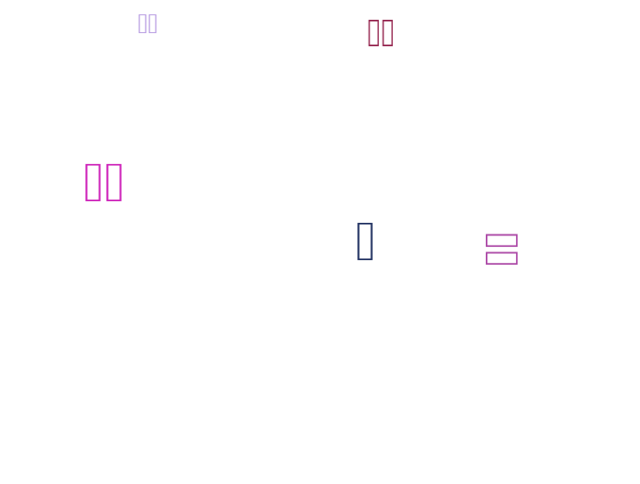

In [158]:
# 워드 클라우드를 그릴 이미지 출력
from PIL import Image
mask = np.array(Image.open('/content/love.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [159]:
!pip install Pillow

In [160]:
text = "
for t in range(3) :
  text = text + 러스트
  "

In [162]:
from wordcloud import WordCloud

#워드 클라우드 그릴 준비:
# 한글을 출력하고자 하는 경우는 font_path에 한글 폰트 파일 경로를 설정
wordcloud = WordCloud(background_color='white', max_words=2000, mask = mask)

#메모리에 워드클라우드 만들기
wordcloud = wordcloud.generate(text)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
page_num =

In [ ]:
# 파싱한 내용을 저장할 텍스트 파일 생성
output_file = open(keyword + "txt", 'w', encoding='utf8')

# 기사 링크를 한 곳에 저장하기
for i in range(page_num)
print(page_num)

In [ ]:
for i in range(page_num):
  current_page_num = 1 + i * 10
  target_URL = ""



In [181]:
# 감성 분석
# 나이브 베이즈 분류기를 이용한 영문 감성 분석
from nltk.tokenize import word_tokenize
import nltk

train = [
    ('I like you', 'pos'),
    ('I do not like you', 'neg'),
    ('I hate you', 'neg'),
    ('I do not hate you', 'pos'),
    ('I love you', 'pos'),
    ('I do not like Jessica')
]


# 단어의 집합을 생성

#train 데이터의 모든 것을 순차적으로 sentence에 대입한 후
#sentence의 첫번째 데이터를 공백을 기준으로 분할해서 word에 순차적으로 할당 한 후
# word를 소문자로 변경해서 set으로 생성
all_words = set(word.lower()
for sentence in train
                for word in word_tokenize(sentence[0]))
print(all_words)

{'hate', 'you', 'like', 'i', 'not', 'love', 'do'}


In [177]:
# 피처 벡터화 수행
# train의 모든 데이터를 x에 대입한 후
# 튜플을 생성하는데 뒤는 감성을 그대로 저장하고
# 앞은 all_words 모든 단어 와 존재 여부를 딕셔너리로 가지고 있습니다.
t = [(dict((word, (word in word_tokenize(x[0]))) for word in all_words), x[1]) for x in train]

print(t)
# 나이브 베이즈 분류기를 이용해서 감성 분석을 하기 위해서는
#각 문장이 단어의 존재 여부를 가진 dict와 감성을 나타내는 텍스트 나 숫자의 튜플로 변환이 되어야 합니다

[({'hate': False, 'you': True, 'like': True, 'i': False, 'not': False, 'love': False, 'do': False}, 'pos'), ({'hate': False, 'you': True, 'like': True, 'i': False, 'not': True, 'love': False, 'do': True}, 'neg'), ({'hate': True, 'you': True, 'like': False, 'i': False, 'not': False, 'love': False, 'do': False}, 'neg'), ({'hate': True, 'you': True, 'like': False, 'i': False, 'not': True, 'love': False, 'do': True}, 'pos'), ({'hate': False, 'you': True, 'like': False, 'i': False, 'not': False, 'love': True, 'do': False}, 'pos'), ({'hate': False, 'you': False, 'like': False, 'i': False, 'not': False, 'love': False, 'do': False}, ' ')]


In [178]:
# 나이브 베이즈 분류기로 훈련
classifier = nltk.NaiveBayesClassifier.train(t)
# 각 단어가 감성에 미치는 확률을 확인
classifier.show_most_informative_features()

Most Informative Features
                      do = False                 : neg    =      1.5 : 1.0
                    hate = False                 : neg    =      1.5 : 1.0
                    like = False                 : neg    =      1.5 : 1.0
                     not = False                 : neg    =      1.5 : 1.0
                      do = True              neg : pos    =      1.3 : 1.0
                    hate = True              neg : pos    =      1.3 : 1.0
                    like = True              neg : pos    =      1.3 : 1.0
                    love = False             neg : pos    =      1.3 : 1.0
                     not = True              neg : pos    =      1.3 : 1.0
                     you = True              pos : neg    =      1.1 : 1.0


In [179]:
# 예측 - 예측할 때 문장을 바로 대입하는 것이 아니고 문장을 피처로 변환해서 대입
test_sentence = 'I do not like Jessica'

test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}
# 테스트 문장을 피처화
print(test_sent_features)

{'hate': False, 'you': False, 'like': True, 'i': True, 'not': True, 'love': False, 'do': True}


In [180]:
print(classifier.classify(test_sent_features))
# 이런 형태의 애플리케이선을 만들 때는 새로 들어오는 데이터를 가지고
# 자동으로 학습하는 형태로 애프릴케이션을 구성해야 합니다.

neg
